Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

import itertools
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


Importing Dataset

In [2]:
data = pd.read_csv('extracted_data.csv')
data.head()

,PAMW,PAIW,%Hpho,%Hphi,%Neu,%Hpho_Hpho,%Hpho_Hphi,%Hpho_Neu,%Hphi_Hpho,%Hphi_Hphi,...,W-mean,W-SD,W-CV,Y-mean,Y-SD,Y-CV,para_ds_mean,alt_ds_mean,quad_ds_mean,family_name
0,23115.206457,1069.689571,56.285714,16.571429,27.142857,33.142857,10.000000,12.857143,9.142857,2.285714,...,0.372146,0.376131,1.010707,0.418668,0.349933,0.835824,34.000000,30.750000,30.750000,G-protein coupled family
1,27542.733146,1280.244437,40.375587,23.004695,36.619718,15.258216,10.563380,14.553991,9.154930,4.694836,...,0.553357,0.373922,0.675733,0.538212,0.265269,0.492871,66.000000,116.500000,116.500000,Actin family
2,29144.379866,1336.623803,48.098434,19.686801,32.214765,23.937360,8.501119,15.659955,8.501119,4.697987,...,0.432113,0.388653,0.899426,0.373693,0.279036,0.746699,70.666667,111.000000,111.000000,Ligand-gated ion channel (TC 1.A.9) family
3,26080.428034,1251.964903,52.669903,17.475728,29.854369,32.524272,8.980583,11.165049,7.524272,3.640777,...,0.515924,0.329824,0.639289,0.500000,0.297654,0.595309,19.428571,21.166667,21.166667,G-protein coupled family
4,20449.996921,984.638952,46.666667,23.492063,29.841270,21.587302,12.698413,12.380952,9.206349,5.079365,...,0.500000,0.500000,1.000000,0.520542,0.304956,0.585843,72.000000,0.000000,0.000000,Mitochondrial carrier (TC 2.A.29) family


In [3]:
data.describe()

,PAMW,PAIW,%Hpho,%Hphi,%Neu,%Hpho_Hpho,%Hpho_Hphi,%Hpho_Neu,%Hphi_Hpho,%Hphi_Hphi,...,V-CV,W-mean,W-SD,W-CV,Y-mean,Y-SD,Y-CV,para_ds_mean,alt_ds_mean,quad_ds_mean
count,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,...,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000
mean,31464.448607,1459.765034,48.346340,19.746426,31.907234,24.438490,8.486075,15.308587,8.948592,4.651667,...,0.659544,0.404478,0.308270,0.674866,0.493412,0.329728,0.676549,63.288124,38.950026,32.728919
std,20530.285822,954.723730,7.617079,5.203996,3.999520,7.737592,1.851894,1.907885,1.647845,2.110126,...,0.113911,0.190516,0.142125,0.334386,0.084457,0.047670,0.139723,67.765945,46.636560,43.730592
min,3634.742679,171.062143,24.161074,8.125000,20.063694,4.173355,2.946768,7.046980,2.851711,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20636.562258,968.041317,41.783494,15.594542,28.835979,17.393583,7.131012,13.813969,7.628524,3.065134,...,0.584258,0.293456,0.285084,0.568659,0.443463,0.311246,0.605354,18.833333,0.000000,0.000000
50%,25478.592130,1186.697312,51.724138,17.664716,32.064355,27.860697,8.024691,15.625000,8.950617,3.846154,...,0.636664,0.469697,0.319574,0.691194,0.497491,0.332613,0.673033,37.333333,33.250000,19.000000
75%,38019.624234,1771.722715,54.761905,24.376668,33.807289,30.635838,9.820981,16.917092,9.942639,6.043956,...,0.757107,0.533333,0.386510,0.981106,0.547826,0.347628,0.750036,66.482620,52.750000,49.333333
max,264014.819463,12119.972403,66.666667,38.590604,61.787072,45.000000,16.279070,22.304833,18.181818,17.758621,...,1.435857,0.805185,0.500000,1.575646,0.798131,0.500000,1.386966,446.000000,966.000000,921.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 93 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PAMW           11414 non-null  float64
 1   PAIW           11414 non-null  float64
 2   %Hpho          11414 non-null  float64
 3   %Hphi          11414 non-null  float64
 4   %Neu           11414 non-null  float64
 5   %Hpho_Hpho     11414 non-null  float64
 6   %Hpho_Hphi     11414 non-null  float64
 7   %Hpho_Neu      11414 non-null  float64
 8   %Hphi_Hpho     11414 non-null  float64
 9   %Hphi_Hphi     11414 non-null  float64
 10  %Hphi_Neu      11414 non-null  float64
 11  %Neu_Hpho      11414 non-null  float64
 12  %Neu_Hphi      11414 non-null  float64
 13  %Neu_Neu       11414 non-null  float64
 14  6_letter_mean  11414 non-null  float64
 15  6_letter_sd    11414 non-null  float64
 16  6_letter_cv    11414 non-null  float64
 17  2-gram-mean    11414 non-null  float64
 18  2-gram

In [5]:
data = data.iloc[: , 29:]
data.head()

,A-mean,A-SD,A-CV,C-mean,C-SD,C-CV,D-mean,D-SD,D-CV,E-mean,...,W-mean,W-SD,W-CV,Y-mean,Y-SD,Y-CV,para_ds_mean,alt_ds_mean,quad_ds_mean,family_name
0,0.435766,0.315023,0.722919,0.455528,0.314453,0.690305,0.430290,0.343996,0.799452,0.460486,...,0.372146,0.376131,1.010707,0.418668,0.349933,0.835824,34.000000,30.750000,30.750000,G-protein coupled family
1,0.389832,0.269477,0.691265,0.524675,0.363183,0.692205,0.486111,0.329754,0.678351,0.444048,...,0.553357,0.373922,0.675733,0.538212,0.265269,0.492871,66.000000,116.500000,116.500000,Actin family
2,0.477916,0.318930,0.667335,0.612082,0.369841,0.604235,0.356848,0.272679,0.764133,0.506107,...,0.432113,0.388653,0.899426,0.373693,0.279036,0.746699,70.666667,111.000000,111.000000,Ligand-gated ion channel (TC 1.A.9) family
3,0.447984,0.307581,0.686589,0.333481,0.282167,0.846127,0.672386,0.360470,0.536106,0.542566,...,0.515924,0.329824,0.639289,0.500000,0.297654,0.595309,19.428571,21.166667,21.166667,G-protein coupled family
4,0.389474,0.294120,0.755174,0.498016,0.395290,0.793729,0.551215,0.298773,0.542026,0.460678,...,0.500000,0.500000,1.000000,0.520542,0.304956,0.585843,72.000000,0.000000,0.000000,Mitochondrial carrier (TC 2.A.29) family


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A-mean        11414 non-null  float64
 1   A-SD          11414 non-null  float64
 2   A-CV          11414 non-null  float64
 3   C-mean        11414 non-null  float64
 4   C-SD          11414 non-null  float64
 5   C-CV          11414 non-null  float64
 6   D-mean        11414 non-null  float64
 7   D-SD          11414 non-null  float64
 8   D-CV          11414 non-null  float64
 9   E-mean        11414 non-null  float64
 10  E-SD          11414 non-null  float64
 11  E-CV          11414 non-null  float64
 12  F-mean        11414 non-null  float64
 13  F-SD          11414 non-null  float64
 14  F-CV          11414 non-null  float64
 15  G-mean        11414 non-null  float64
 16  G-SD          11414 non-null  float64
 17  G-CV          11414 non-null  float64
 18  H-mean        11414 non-nu

<AxesSubplot:>

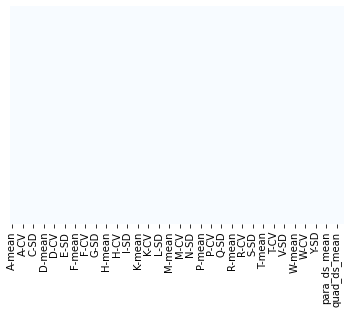

In [7]:
#Generating HeatMap
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [8]:
data.isnull().sum()

A-mean          0
A-SD            0
A-CV            0
C-mean          0
C-SD            0
               ..
Y-CV            0
para_ds_mean    0
alt_ds_mean     0
quad_ds_mean    0
family_name     0
Length: 64, dtype: int64

In [9]:
data = data.rename(columns = {'family_name': 'label'})
data['label'].value_counts()

G-protein coupled family                              2117
Complex I family                                      1534
Cytochrome b family                                   1393
Cytochrome c oxidase family                            670
Krueppel C2H2-type zinc-finger protein family          514
Peptidase S1 family                                    408
Heme-copper respiratory oxidase family                 406
Tyr protein kinase family                              359
Ammonium transporter (TC 2.A.49) family                337
Nuclear hormone receptor family                        313
Protein kinase superfamily                             310
Cytochrome P450 family                                 244
Mitochondrial carrier (TC 2.A.29) family               185
Intermediate filament family                           179
Peptidase C19 family                                   176
Serpin family                                          173
Kinesin family                                         1

In [10]:
f_name = np.unique(data['label'])
f_name

array(['AGC Ser/Thr protein kinase family', 'Actin family',
       'Ammonium transporter (TC 2.A.49) family',
       'Cation transport ATPase (P-type) (TC 3.A.3) family',
       'Complex I family', 'Cyclic nucleotide phosphodiesterase family',
       'Cyclin family', 'Cytochrome P450 family', 'Cytochrome b family',
       'Cytochrome c oxidase family', 'DEAD box helicase family',
       'G-protein coupled family', 'Glycosyltransferase 29 family',
       'Heme-copper respiratory oxidase family',
       'Intermediate filament family', 'Kinesin family',
       'Krueppel C2H2-type zinc-finger protein family',
       'Ligand-gated ion channel (TC 1.A.9) family',
       'Mitochondrial carrier (TC 2.A.29) family', 'Myosin family',
       'Nuclear hormone receptor family', 'PI3/PI4-kinase family',
       'Peptidase C19 family', 'Peptidase S1 family',
       'Protein kinase superfamily',
       'Protein-tyrosine phosphatase family', 'Septin GTPase family',
       'Serpin family',
       'Short-

In [11]:
mapping = {}
i = 0

for item in f_name:
    i += 1
    mapping[item] = i
    
data = data.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [12]:
#mapping = {'Complex I subunit 4 family': 1, 'Cytochrome c oxidase subunit 2 family': 2, 'Cytochrome c oxidase subunit 3 family': 3, 'Krueppel C2H2-type zinc-finger protein family': 4, 'Peptidase S1 family': 5}
#data = data.applymap(lambda s: mapping.get(s) if s in mapping else s)
#data.replace({'PRP4like': mapping, 'SOCSboxlike': mapping, 'MiaElike': mapping, 'MarineMetagenomeFamilyWH1': mapping, 'FaeAlike': mapping, 'DsbBlike': mapping})

In [13]:
#data_label = pd.factorize(f_name)[0].tolist()

data_label =  [mapping[s] for s in f_name]
#data_label = sorted(data_label)
data_label

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [14]:
mapping['Complex I family']

5

In [15]:
data.head()

,A-mean,A-SD,A-CV,C-mean,C-SD,C-CV,D-mean,D-SD,D-CV,E-mean,...,W-mean,W-SD,W-CV,Y-mean,Y-SD,Y-CV,para_ds_mean,alt_ds_mean,quad_ds_mean,label
0,0.435766,0.315023,0.722919,0.455528,0.314453,0.690305,0.430290,0.343996,0.799452,0.460486,...,0.372146,0.376131,1.010707,0.418668,0.349933,0.835824,34.000000,30.750000,30.750000,12
1,0.389832,0.269477,0.691265,0.524675,0.363183,0.692205,0.486111,0.329754,0.678351,0.444048,...,0.553357,0.373922,0.675733,0.538212,0.265269,0.492871,66.000000,116.500000,116.500000,2
2,0.477916,0.318930,0.667335,0.612082,0.369841,0.604235,0.356848,0.272679,0.764133,0.506107,...,0.432113,0.388653,0.899426,0.373693,0.279036,0.746699,70.666667,111.000000,111.000000,18
3,0.447984,0.307581,0.686589,0.333481,0.282167,0.846127,0.672386,0.360470,0.536106,0.542566,...,0.515924,0.329824,0.639289,0.500000,0.297654,0.595309,19.428571,21.166667,21.166667,12
4,0.389474,0.294120,0.755174,0.498016,0.395290,0.793729,0.551215,0.298773,0.542026,0.460678,...,0.500000,0.500000,1.000000,0.520542,0.304956,0.585843,72.000000,0.000000,0.000000,19


In [16]:
# Extract the labels
data_copy = data
labels = np.array(data.pop('label'))


# 30% examples in test data
SEED = np.random.seed()
train, test, train_labels, test_labels = train_test_split(data, labels, stratify = labels, test_size = 0.15, random_state = SEED)

In [17]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [18]:
train.shape

(9701, 63)

In [19]:
test.shape

(1713, 63)

In [20]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=SEED, max_features = 'sqrt', n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, verbose=1)

In [21]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 2719
Average maximum depth 30


In [22]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
train_rf_predictions

array([ 3, 30, 12, ..., 17,  6, 24])

In [24]:
train_labels

array([ 3, 30, 12, ..., 17,  6, 24])

In [25]:
corelation = np.corrcoef(train_rf_predictions,train_labels)
corelation

array([[1.        , 0.99780116],
       [0.99780116, 1.        ]])

<AxesSubplot:>

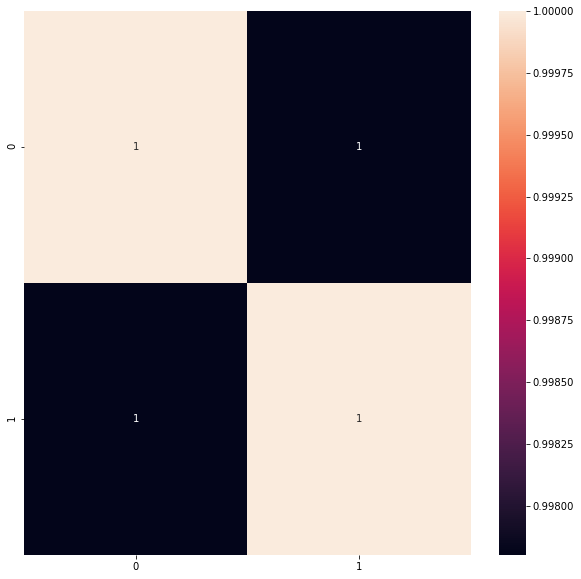

In [26]:
#corelation = (train_rf_predictions,train_labels).corr()
f, ax = plt.subplots(figsize = (10, 10))    #SEtting the figure size enables us to better visualize the heatmap values.
sns.heatmap(corelation, annot = True)

In [27]:
train_rf_probs

array([0.  , 0.02, 0.  , ..., 0.  , 0.02, 0.  ])

In [28]:
rf_predictions

array([25, 12, 16, ..., 24, 12, 12])

In [29]:
test_labels

array([11, 12, 16, ..., 24, 12, 11])

In [30]:
rf_probs

array([0.07, 0.  , 0.01, ..., 0.  , 0.  , 0.01])

In [31]:
np.corrcoef(rf_predictions, test_labels)

array([[1.       , 0.8580256],
       [0.8580256, 1.       ]])

In [32]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
60,para_ds_mean,0.055266
10,E-SD,0.039940
52,V-SD,0.033197
5,C-CV,0.031868
4,C-SD,0.029133
24,K-mean,0.028338
62,quad_ds_mean,0.028275
44,R-CV,0.025366
25,K-SD,0.024757
29,L-CV,0.024571


Random Forest Optimization through Bagging

In [33]:
kfold = model_selection.KFold(n_splits=10)
num_trees = 100
model_bag = BaggingClassifier(base_estimator=model, random_state=SEED)
results = model_selection.cross_val_score(model_bag, train, train_labels, cv=kfold)
results
#np.corrcoef(results, train_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Don

array([0.87332647, 0.86391753, 0.8742268 , 0.86804124, 0.86185567,
       0.87216495, 0.87319588, 0.8814433 , 0.86082474, 0.87628866])

In [34]:
model_bag.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Don

BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                        n_jobs=-1, verbose=1))

In [35]:
train_rf_predictions_bag = model_bag.predict(train)
train_rf_probs_bag = model_bag.predict_proba(train)[:, 1]

rf_predictions_bag = model_bag.predict(test)
rf_probs_bag = model_bag.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

In [36]:
rf_predictions_bag

array([25, 12, 16, ..., 24, 12, 12])

In [37]:
test_labels

array([11, 12, 16, ..., 24, 12, 11])

In [38]:
np.corrcoef(train_rf_predictions_bag, train_labels)

array([[1.       , 0.9970451],
       [0.9970451, 1.       ]])

In [39]:
np.corrcoef(train_rf_predictions, train_labels)

array([[1.        , 0.99780116],
       [0.99780116, 1.        ]])

In [40]:
np.corrcoef(rf_predictions_bag, test_labels)

array([[1.        , 0.86501149],
       [0.86501149, 1.        ]])

In [41]:
np.corrcoef(rf_predictions, test_labels)

array([[1.       , 0.8580256],
       [0.8580256, 1.       ]])

In [42]:
from sklearn.ensemble import GradientBoostingClassifier


model_grad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_grad.fit(train, train_labels)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [43]:
train_rf_predictions_grad = model_grad.predict(train)
train_rf_probs_grad = model_grad.predict_proba(train)[:, 1]

rf_predictions_grad = model_grad.predict(test)
rf_probs_grad = model_grad.predict_proba(test)[:, 1]

In [44]:
np.corrcoef(train_rf_predictions_grad, train_labels)

array([[1.        , 0.46606743],
       [0.46606743, 1.        ]])

In [45]:
np.corrcoef(rf_predictions_grad, test_labels)

array([[1.        , 0.46710001],
       [0.46710001, 1.        ]])

In [46]:
from sklearn.ensemble import VotingClassifier

model_vote= VotingClassifier(estimators=[('RF', model), ('Bagging', model_bag), ('Gradient_Boost', model_grad)], voting='hard')
model_vote.fit(train, train_labels)

print("Finished")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Don

Finished


In [47]:
train_rf_predictions_hardvote = model_vote.predict(train)
#train_rf_probs_hardvote = model_vote.predict_proba(train)[:, 1]

rf_predictions_hardvote = model_vote.predict(test)
#rf_probs_hardvote = model_vote.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

In [48]:
np.corrcoef(train_rf_predictions_hardvote, train_labels)

array([[1.        , 0.99654043],
       [0.99654043, 1.        ]])

In [49]:
np.corrcoef(rf_predictions_hardvote, test_labels)

array([[1.        , 0.85420077],
       [0.85420077, 1.        ]])

In [52]:
from sklearn.model_selection import cross_val_score

Model_Accuracy = []

for test_model, label in zip([model, model_bag, model_grad, model_vote], ['Random Forest', 'Bagging', 'Gradient-Boost', 'Ensemble']):
    scores = cross_val_score(test_model, train, train_labels, scoring='accuracy', cv=5)
    Model_Accuracy.append("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]:

In [53]:
Model_Accuracy

['Accuracy: 0.87 (+/- 0.00) [Random Forest]',
 'Accuracy: 0.86 (+/- 0.00) [Bagging]',
 'Accuracy: 0.06 (+/- 0.05) [Gradient-Boost]',
 'Accuracy: 0.86 (+/- 0.00) [Ensemble]']

In [54]:
unique, counts = np.unique(test_labels, return_counts=True)
uniquep, countsp = np.unique(rf_predictions, return_counts=True)
print (np.asarray((unique, counts)).T)
print (np.asarray((uniquep, countsp)).T)

[[  1  15]
 [  2  17]
 [  3  51]
 [  4  19]
 [  5 230]
 [  6  15]
 [  7  16]
 [  8  37]
 [  9 209]
 [ 10 100]
 [ 11  21]
 [ 12 318]
 [ 13  14]
 [ 14  61]
 [ 15  27]
 [ 16  26]
 [ 17  77]
 [ 18  22]
 [ 19  28]
 [ 20  25]
 [ 21  47]
 [ 22  14]
 [ 23  26]
 [ 24  61]
 [ 25  46]
 [ 26  19]
 [ 27  15]
 [ 28  26]
 [ 29  14]
 [ 30  14]
 [ 31  19]
 [ 32  15]
 [ 33  54]
 [ 34  15]]
[[  1  10]
 [  2  14]
 [  3  43]
 [  4  16]
 [  5 229]
 [  6   9]
 [  7   8]
 [  8  34]
 [  9 210]
 [ 10 101]
 [ 11  18]
 [ 12 392]
 [ 13   8]
 [ 14  61]
 [ 15  28]
 [ 16  23]
 [ 17  76]
 [ 18  14]
 [ 19  30]
 [ 20  16]
 [ 21  43]
 [ 22   9]
 [ 23  21]
 [ 24  60]
 [ 25  62]
 [ 26   8]
 [ 27  12]
 [ 28  29]
 [ 29   6]
 [ 30  11]
 [ 31  12]
 [ 32  12]
 [ 33  75]
 [ 34  13]]


In [56]:
Predict_Accuracy =[]

for test_model, label in zip([model, model_bag, model_grad, model_vote], ['Random Forest', 'Bagging', 'Gradient-Boost', 'Ensemble']):
    scores = cross_val_score(test_model, test, test_labels, scoring='accuracy', cv=5)
    Predict_Accuracy.append("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]:

In [57]:
Predict_Accuracy

['Accuracy: 0.76 (+/- 0.02) [Random Forest]',
 'Accuracy: 0.75 (+/- 0.02) [Bagging]',
 'Accuracy: 0.08 (+/- 0.09) [Gradient-Boost]',
 'Accuracy: 0.74 (+/- 0.02) [Ensemble]']

In [58]:
model_soft_vote= VotingClassifier(estimators=[('RF', model), ('Bagging', model_bag), ('Gradient_Boost', model_grad)], voting='soft')

In [59]:
model_soft_vote.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Don

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_jobs=-1, verbose=1)),
                             ('Bagging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                                                      n_jobs=-1,
                                                                                      verbose=1))),
                             ('Gradient_Boost',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         random_state=0))],
                 voting='soft')

In [60]:
train_rf_predictions_softvote = model_soft_vote.predict(train)
train_rf_probs_softvote = model_soft_vote.predict_proba(train)[:, 1]

rf_predictions_softvote = model_soft_vote.predict(test)
rf_probs_softvote = model_soft_vote.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

In [61]:
np.corrcoef(train_rf_predictions_hardvote, train_labels)

array([[1.        , 0.99654043],
       [0.99654043, 1.        ]])

In [62]:
Model_Accuracy = []

for test_model, label in zip([model, model_bag, model_grad, model_soft_vote], ['Random Forest', 'Bagging', 'Gradient-Boost', 'Ensemble']):
    scores = cross_val_score(test_model, train, train_labels, scoring='accuracy', cv=5)
    Model_Accuracy.append("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]:

In [63]:
Model_Accuracy

['Accuracy: 0.87 (+/- 0.00) [Random Forest]',
 'Accuracy: 0.86 (+/- 0.00) [Bagging]',
 'Accuracy: 0.06 (+/- 0.05) [Gradient-Boost]',
 'Accuracy: 0.71 (+/- 0.00) [Ensemble]']

Hard Voting. Predict the class with the largest sum of votes from models
Soft Voting. Predict the class with the largest summed probability from models.

Hard voting is for models that predict class labels.
Soft voting is for models that predict class membership probabilities.

AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [64]:
numpy_data = np.array([train_rf_predictions, train_rf_predictions_bag, train_rf_predictions_grad, train_rf_predictions_hardvote, train_rf_predictions_softvote, train_labels])

#numpy_data
df = pd.DataFrame(data=numpy_data, columns = ["P{}".format(i) for i in range(len(train_labels))], index=["Random Forest", "Bagging", "Gradient-Boost", "Ensemble_Hard_Vote", "Ensemble_Soft_Vote", "Original_Model"])
df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P9691,P9692,P9693,P9694,P9695,P9696,P9697,P9698,P9699,P9700
Random Forest,3,30,12,9,8,9,17,22,17,14,...,12,21,3,18,10,5,5,17,6,24
Bagging,3,30,12,9,8,9,17,22,17,14,...,12,21,3,18,10,5,5,17,6,24
Gradient-Boost,17,30,17,9,12,9,17,17,17,12,...,30,32,30,17,12,5,5,9,30,30
Ensemble_Hard_Vote,3,30,12,9,8,9,17,22,17,14,...,12,21,3,18,10,5,5,17,6,24
Ensemble_Soft_Vote,3,30,12,9,8,9,17,22,17,14,...,12,21,3,18,10,5,5,17,6,24
Original_Model,3,30,12,9,8,9,17,22,17,14,...,12,21,3,18,10,5,5,17,6,24


<AxesSubplot:>

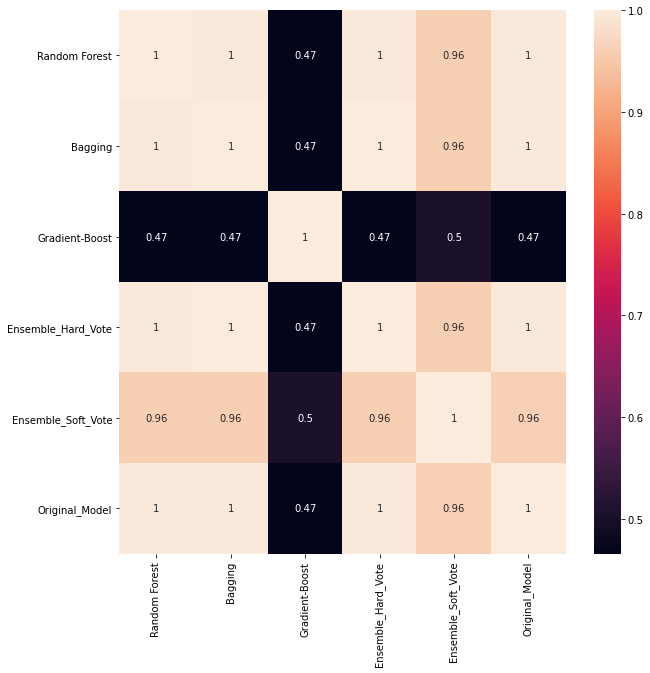

In [65]:
#Finding the Corelation among the data and Plotting them on a heatmap:

corelation = df.transpose().corr()
f, ax = plt.subplots(figsize = (10, 10))    #SEtting the figure size enables us to better visualize the heatmap values.
sns.heatmap(corelation, annot = True)

In [66]:
numpy_data2 = np.array([rf_predictions, rf_predictions_bag, rf_predictions_grad, rf_predictions_hardvote, rf_predictions_softvote, test_labels])

#numpy_data
df2 = pd.DataFrame(data=numpy_data2, columns = ["P{}".format(i) for i in range(len(test))], 
                   index=["Random Forest", "Bagging", "Gradient-Boost", "Ensemble_Hard_Vote", "Ensemble_Soft_Vote", "Original_Model"])
df2

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P1703,P1704,P1705,P1706,P1707,P1708,P1709,P1710,P1711,P1712
Random Forest,25,12,16,24,33,24,12,5,12,12,...,9,5,10,12,17,28,21,24,12,12
Bagging,25,12,16,24,33,24,12,5,18,12,...,9,5,10,12,17,28,21,24,12,12
Gradient-Boost,12,17,26,30,17,30,17,5,30,1,...,9,5,12,17,17,30,17,30,1,32
Ensemble_Hard_Vote,8,12,16,24,33,24,12,5,8,12,...,9,5,10,12,17,28,21,24,12,12
Ensemble_Soft_Vote,12,12,26,30,33,24,12,5,30,12,...,9,5,10,12,17,30,17,24,12,32
Original_Model,11,12,16,24,33,24,12,5,7,12,...,9,5,10,12,17,28,16,24,12,11


<AxesSubplot:>

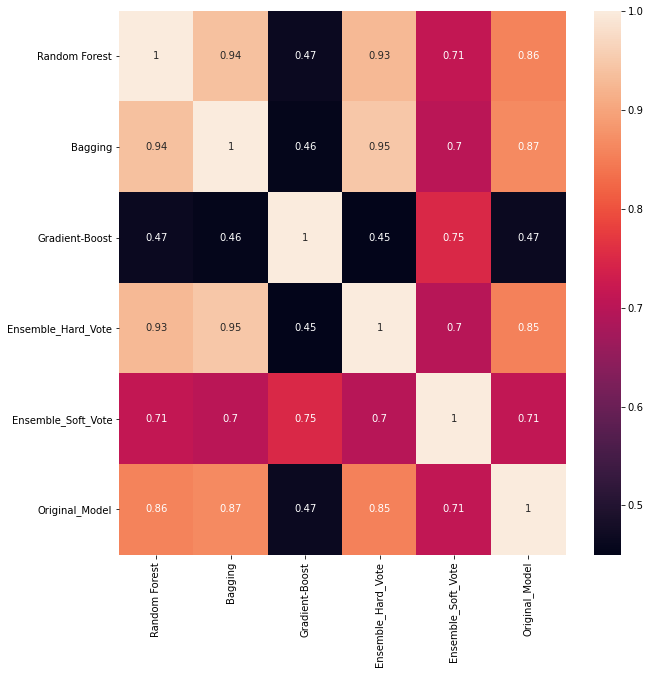

In [67]:
#Finding the Corelation among the data and Plotting them on a heatmap:

corelation = df2.transpose().corr()
f, ax = plt.subplots(figsize = (10, 10))    #SEtting the figure size enables us to better visualize the heatmap values.
sns.heatmap(corelation, annot = True)

In [68]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


arr = multilabel_confusion_matrix(test_labels, rf_predictions)
arr

array([[[1697,    1],
        [   6,    9]],

       [[1695,    1],
        [   4,   13]],

       [[1662,    0],
        [   8,   43]],

       [[1694,    0],
        [   3,   16]],

       [[1483,    0],
        [   1,  229]],

       [[1698,    0],
        [   6,    9]],

       [[1696,    1],
        [   9,    7]],

       [[1674,    2],
        [   5,   32]],

       [[1503,    1],
        [   0,  209]],

       [[1612,    1],
        [   0,  100]],

       [[1691,    1],
        [   4,   17]],

       [[1315,   80],
        [   6,  312]],

       [[1698,    1],
        [   7,    7]],

       [[1652,    0],
        [   0,   61]],

       [[1680,    6],
        [   5,   22]],

       [[1682,    5],
        [   8,   18]],

       [[1628,    8],
        [   9,   68]],

       [[1689,    2],
        [  10,   12]],

       [[1678,    7],
        [   5,   23]],

       [[1687,    1],
        [  10,   15]],

       [[1663,    3],
        [   7,   40]],

       [[1699,    0],
        [   

In [69]:
cnf_matrix = confusion_matrix(test_labels, rf_predictions)
print(cnf_matrix)

[[ 9  0  0 ...  0  1  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  0 ...  0  0  9]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


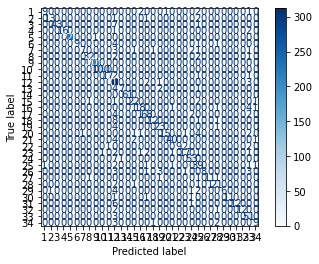

In [70]:
disp = plot_confusion_matrix(model, test, test_labels,
                                 display_labels=sorted(data_label),
                                 cmap=plt.cm.Blues)

plt.show()

In [71]:
np.unique(test_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 array([ 15,  17,  51,  19, 230,  15,  16,  37, 209, 100,  21, 318,  14,
         61,  27,  26,  77,  22,  28,  25,  47,  14,  26,  61,  46,  19,
         15,  26,  14,  14,  19,  15,  54,  15]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


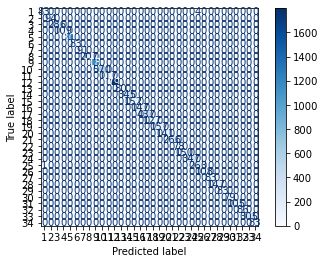

In [72]:
disp = plot_confusion_matrix(model, train, train_labels,
                                 display_labels=sorted(data_label),
                                 cmap=plt.cm.Blues)

plt.show()

In [73]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)

TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)

TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# F-Score for each class
FSC =  2*(PPV * TPR)/(PPV + TPR)



In [74]:
numpy_data3 = np.array([i*100 for i in [TPR, TNR, PPV, FPR, FNR, ACC, FSC]])

#numpy_data
df3 = pd.DataFrame(data=numpy_data3, columns = [f_name], 
                   index=["Sensitivity", "Specificity", "Precision", "false positive rate", "False negative rate", "Accuracy", "F-Score"])
df3

,AGC Ser/Thr protein kinase family,Actin family,Ammonium transporter (TC 2.A.49) family,Cation transport ATPase (P-type) (TC 3.A.3) family,Complex I family,Cyclic nucleotide phosphodiesterase family,Cyclin family,Cytochrome P450 family,Cytochrome b family,Cytochrome c oxidase family,...,Protein kinase superfamily,Protein-tyrosine phosphatase family,Septin GTPase family,Serpin family,Short-chain dehydrogenases/reductases (SDR) family,TGF-beta family,Tetraspanin (TM4SF) family,Tubulin family,Tyr protein kinase family,Ubiquitin-conjugating enzyme family
Sensitivity,60.000000,76.470588,84.313725,84.210526,99.565217,60.000000,43.750000,86.486486,100.000000,100.000000,...,84.782609,42.105263,73.333333,80.769231,42.857143,78.571429,63.157895,80.000000,94.444444,60.000000
Specificity,99.941107,99.941038,100.000000,100.000000,100.000000,100.000000,99.941072,99.880668,99.933511,99.938004,...,98.620276,100.000000,99.941107,99.525785,100.000000,100.000000,100.000000,100.000000,98.553345,99.764429
Precision,90.000000,92.857143,100.000000,100.000000,100.000000,100.000000,87.500000,94.117647,99.523810,99.009901,...,62.903226,100.000000,91.666667,72.413793,100.000000,100.000000,100.000000,100.000000,68.000000,69.230769
false positive rate,0.058893,0.058962,0.000000,0.000000,0.000000,0.000000,0.058928,0.119332,0.066489,0.061996,...,1.379724,0.000000,0.058893,0.474215,0.000000,0.000000,0.000000,0.000000,1.446655,0.235571
False negative rate,40.000000,23.529412,15.686275,15.789474,0.434783,40.000000,56.250000,13.513514,0.000000,0.000000,...,15.217391,57.894737,26.666667,19.230769,57.142857,21.428571,36.842105,20.000000,5.555556,40.000000
Accuracy,99.591360,99.708114,99.532983,99.824869,99.941623,99.649737,99.416229,99.591360,99.941623,99.941623,...,98.248687,99.357852,99.708114,99.241097,99.532983,99.824869,99.591360,99.824869,98.423818,99.416229
F-Score,72.000000,83.870968,91.489362,91.428571,99.782135,75.000000,58.333333,90.140845,99.761337,99.502488,...,72.222222,59.259259,81.481481,76.363636,60.000000,88.000000,77.419355,88.888889,79.069767,64.285714


In [75]:
y=df3.index.values.tolist()
y


['Sensitivity',
 'Specificity',
 'Precision',
 'false positive rate',
 'False negative rate',
 'Accuracy',
 'F-Score']

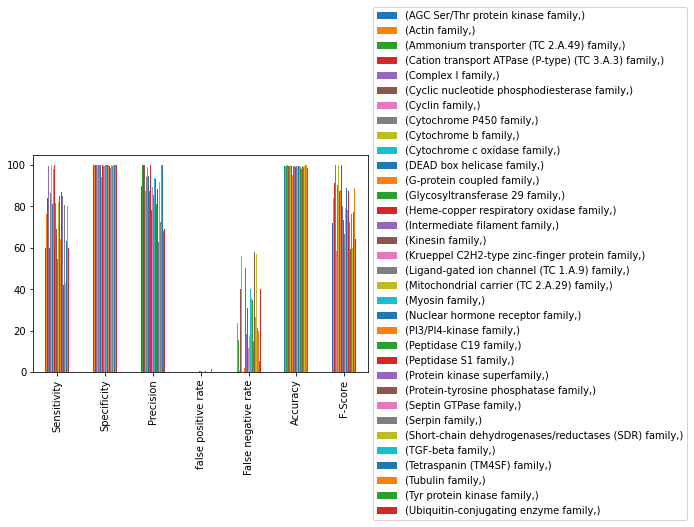

In [76]:
ax = df3.plot.bar().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [77]:
test_labels_unique, value_counts_unique = np.unique(test_labels, return_counts=True)
test_labels_rf, value_counts_rf = np.unique(rf_predictions, return_counts=True)
test_labels_bag, value_counts_bag = np.unique(rf_predictions_bag, return_counts=True)
test_labels_grad, value_counts_grad = np.unique(rf_predictions_grad, return_counts=True)
test_labels_sv, value_counts_sv = np.unique(rf_predictions_softvote, return_counts=True)
test_labels_hv, value_counts_hv = np.unique(rf_predictions_hardvote, return_counts=True)

numpy_test_data = np.array([value_counts_unique.tolist(), value_counts_rf.tolist(), 
                            value_counts_bag.tolist(), value_counts_grad.tolist(), value_counts_sv.tolist(), 
                            value_counts_hv.tolist()])
numpy_test_data
#numpy_data
#numpy_test_data.info()

/var/folders/f8/tn6sfn496vnf97wgbrpdtzyw0000gn/T/ipykernel_12792/2227285507.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  numpy_test_data = np.array([value_counts_unique.tolist(), value_counts_rf.tolist(),


array([list([15, 17, 51, 19, 230, 15, 16, 37, 209, 100, 21, 318, 14, 61, 27, 26, 77, 22, 28, 25, 47, 14, 26, 61, 46, 19, 15, 26, 14, 14, 19, 15, 54, 15]),
       list([10, 14, 43, 16, 229, 9, 8, 34, 210, 101, 18, 392, 8, 61, 28, 23, 76, 14, 30, 16, 43, 9, 21, 60, 62, 8, 12, 29, 6, 11, 12, 12, 75, 13]),
       list([9, 14, 43, 16, 229, 9, 6, 36, 211, 100, 16, 419, 6, 62, 28, 21, 71, 11, 29, 16, 41, 10, 18, 58, 62, 9, 11, 28, 6, 11, 10, 11, 72, 14]),
       list([36, 222, 14, 203, 306, 529, 45, 97, 199, 62]),
       list([20, 3, 43, 6, 231, 4, 2, 21, 210, 100, 4, 341, 1, 61, 13, 14, 222, 3, 28, 6, 31, 8, 10, 31, 18, 66, 3, 11, 2, 131, 5, 37, 25, 2]),
       list([11, 13, 44, 16, 230, 10, 8, 40, 211, 102, 19, 429, 6, 62, 27, 20, 76, 10, 27, 16, 43, 10, 20, 53, 54, 8, 10, 24, 7, 11, 10, 11, 64, 11])],
      dtype=object)

In [78]:
df_test = pd.DataFrame(data=[data for data in numpy_test_data], columns = f_name, 
                   index=["Original_Model", "Random Forest", "Bagging", "Gradient-Boost", "Ensemble_Hard_Vote", "Ensemble_Soft_Vote"])
df_test

,AGC Ser/Thr protein kinase family,Actin family,Ammonium transporter (TC 2.A.49) family,Cation transport ATPase (P-type) (TC 3.A.3) family,Complex I family,Cyclic nucleotide phosphodiesterase family,Cyclin family,Cytochrome P450 family,Cytochrome b family,Cytochrome c oxidase family,...,Protein kinase superfamily,Protein-tyrosine phosphatase family,Septin GTPase family,Serpin family,Short-chain dehydrogenases/reductases (SDR) family,TGF-beta family,Tetraspanin (TM4SF) family,Tubulin family,Tyr protein kinase family,Ubiquitin-conjugating enzyme family
Original_Model,15,17,51,19,230,15,16,37,209,100,...,46.0,19.0,15.0,26.0,14.0,14.0,19.0,15.0,54.0,15.0
Random Forest,10,14,43,16,229,9,8,34,210,101,...,62.0,8.0,12.0,29.0,6.0,11.0,12.0,12.0,75.0,13.0
Bagging,9,14,43,16,229,9,6,36,211,100,...,62.0,9.0,11.0,28.0,6.0,11.0,10.0,11.0,72.0,14.0
Gradient-Boost,36,222,14,203,306,529,45,97,199,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ensemble_Hard_Vote,20,3,43,6,231,4,2,21,210,100,...,18.0,66.0,3.0,11.0,2.0,131.0,5.0,37.0,25.0,2.0
Ensemble_Soft_Vote,11,13,44,16,230,10,8,40,211,102,...,54.0,8.0,10.0,24.0,7.0,11.0,10.0,11.0,64.0,11.0
